<a href="https://colab.research.google.com/github/namanmodani/acm-ai-beginner/blob/main/solution_guided_project_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACM AI Beginner Track - Workshop 8**

Discord: https://bit.ly/ACMdiscord \\
Based on: https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece

In [ ]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# set the random seed
np.random.seed(0)

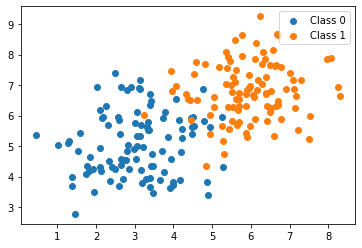

In [ ]:
# create data
x11 = np.random.normal(loc=3, size=100)
x12 = np.random.normal(loc=5, size=100)

x0 = np.stack((x11, x12)).T

x21 = np.random.normal(loc=6, size=100)
x22 = np.random.normal(loc=7, size=100)

x1 = np.stack((x21, x22)).T

X_ori = np.zeros((200, 2))
y_ori = np.zeros(200)
y_ori[100:] = 1
X_ori[:100] = x0
X_ori[100:] = x1

indicies = np.random.choice(np.arange(200), replace=False, size=200)
X = np.zeros((200, 2))
y = np.zeros(200)
X = X_ori[indicies]
y = y_ori[indicies]

plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')
plt.legend()

# augment with 1's

# X = np.hstack((np.ones((200, 1)), X))

In [ ]:
# shape
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (200, 2)
Shape of y: (200,)


In [ ]:
# TO DO: split training and test data with train_test_split - 1 line
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Brief Review of Logistic Regression
N: number of samples \\
f: number of features \\
X: data; shape = (N, f) \\
y: labels/targets; shape = (N, ) \\
W: weights; shape = (f, ) \\
b: bias; scalar \\
a: learning rate; scalar

## $$\textbf{Our hypothesis}$$
### $$\hat{y}(X)=\sigma{(XW+b)}$$

## $$\textbf{Loss function - Binary Cross Entropy}$$
### $$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N}\big(y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y_i})\big) $$

## $$\textbf{Gradients of Loss with respect to W, b}$$
### $$ \frac{\partial L}{\partial W} = \frac{2}{N}X^T\big(\hat{y}-y\big)$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}\big(\hat{y_i}-y_i\big)$$

## $$\textbf{Gradient Descent - update W, b accordingly}$$
### $$W = W - \alpha \frac{\partial L}{\partial W}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$

## **Classes in Python**

In [ ]:
class Rectangle: 

  def __init__(self, b, h): 
      self.b = b 
      self.h = h 
  def area(self): 
      return self.b*self.h 
  def perimeter(self): 
      # TO DO 
      return 2*self.b + 2*self.h 


In [ ]:
my_rect = Rectangle(3, 5) 
print("Area: ", my_rect.area())
print("Perimeter: ", my_rect.perimeter())

Area:  15
Perimeter:  16


In [ ]:
# Logistic Regression Class
class Logistic_Regression():
  """
  Logistic Regression (aka logit, MaxEnt) classifier.

  Logistic_Regression fits a linear model with coefficients w = (w1, ..., wf)
  to minimize the binary cross entropy loss between the observed targets in
  the dataset, and the targets predicted by the linear approximation.

  Parameters:
    num_epochs - number of epochs
    lr - learning rate
    verbose - creates a plot when fitting train data if set to True

  Attributes:
    epochs - number of epochs
    alpha - learning rate
    verbose - creates a plot if set to True
    weights - numpy.ndarray with shape (f, )
    bias - float
    loss_history - list containing the loss of each epoch
  """
  def __init__(self, num_epochs=2000, lr=0.6, verbose=False):
    """
    Initializes a logisitic regression model.
    
    Parameters:
      num_epochs - number of epochs: int
      lr - learning rate: float
      verbose - verbose: boolean
    """
    self.epochs = num_epochs
    self.alpha = lr
    self.verbose = verbose

  def init_params(self, X):
    """
    Initialize the parameters of the model based on input data.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      nothing
    """
    # TO DO : Initialize weights and biases according to the shapes of the input
    self.weights = np.random.rand(X.shape[1])
    self.bias = np.random.rand()

    self.loss_history = []
  
  def activate(self, z):
    """
    Activate the outputs of your model using the sigmoid function

    Parameters:
      z - outputs: numpy.ndarray with shape (N, )

    Returns:
      activations - numpy.ndarray with shape (N, )
    """
    # TO DO: implement sigmoid activation function - 1 line
    activations = 1/(1 + np.exp(-z))
    return activations

  def predict(self, X):
    """
    Makes a prediction using the hypothesis.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      predictions - numpy.ndarray with shape (N, )
    """
    # TO DO: implement predict (using our hypothesis) - 1 line
    predictions = np.dot(X, self.weights) + self.bias
    return self.activate(predictions)

  def loss(self, y, y_hat):
    """
    Computes the Binary Cross Entropy Loss of the current predictions.

    Parameters:
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      loss - float
    """
    # TO DO: compute loss (Binary Cross Entropy) - 1 line
    log_loss = - np.average(y * np.log(np.abs(y_hat)) + (1-y) * np.log(np.abs(1-y_hat)))
    return log_loss

  def grads(self, X, y, y_hat):
    """
    Computes the gradients of the loss with respect the weights and bias.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      grads - tuple containing the gradients dw, db
    """
    n = y.shape[0]
    # TO DO: compute gradients - 2 lines
    dw = (2/n)*np.dot(X.T, (y_hat - y))
    db = (2/n)*np.sum(y_hat - y)
    return dw, db

  def fit(self, X, y):
    """
    Fits the model to the training data and targets.

    Parameters:
      X - training data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )

    Returns:
      a reference to self
    """
    self.init_params(X)
    # main loop for training
    for i in range(self.epochs):
      # TO DO: implement the training routine - about 5 lines
      predictions = self.predict(X)
      loss = self.loss(y, predictions)
      dw, db = self.grads(X, y, predictions)

      self.weights -= self.alpha * dw
      self.bias -= self.alpha * db

      self.loss_history.append(loss)

    if self.verbose:
      plt.figure(figsize=[8, 6])
      plt.xlabel('epoch')
      plt.ylabel('loss')
      plt.plot(np.arange(1, len(self.loss_history) + 1), self.loss_history)
      plt.show()

    return self

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in multiply


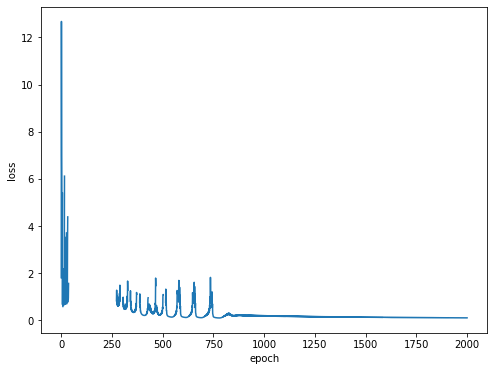

In [ ]:
log_reg = Logistic_Regression(verbose=True).fit(X_train, y_train)

In [ ]:
print('weights:', log_reg.weights)
print('bias:', log_reg.bias.round(10))

weights: [4.01697021 2.09835467]
bias: -32.2630561022


# Data Visualization

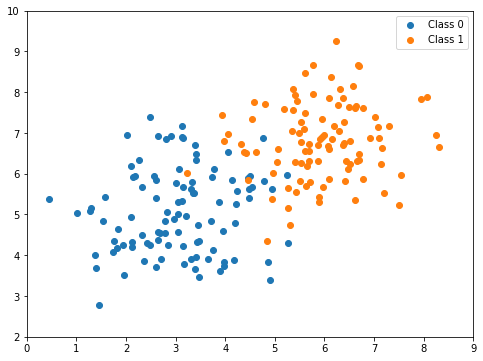

In [ ]:
# plot original data
y_pred = log_reg.predict(X)
plt.figure(figsize=(8, 6))
plt.xlim([0, 9])
plt.ylim([2, 10])
plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')

plt.legend()

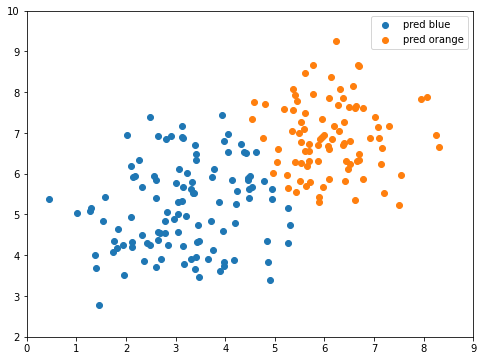

In [ ]:
# plot what our model predicts
plt.figure(figsize=(8, 6))
plt.xlim([0, 9])
plt.ylim([2, 10])
plt.scatter(X[y_pred < 0.5][:, 0], X[y_pred < 0.5][:, 1], label='pred blue')
plt.scatter(X[y_pred > 0.5][:, 0], X[y_pred > 0.5][:, 1], label='pred orange')
plt.legend()

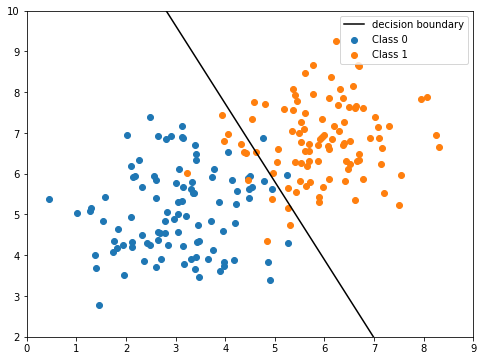

In [ ]:
# plot data
plt.figure(figsize=(8, 6))
plt.xlim([0, 9])
plt.ylim([2, 10])
plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')

# compute slope & intercept of the decision boundary
slope = - (log_reg.weights[0]/log_reg.weights[1])
intercept = - (log_reg.bias/log_reg.weights[1])

# plot decision boundary
X_plot = np.arange(1, 10)
y_plot = slope * X_plot + intercept
plt.plot(X_plot, y_plot, c='black', label='decision boundary')

plt.legend()

# Which accuracy do you expect to be higher?

In [ ]:
# TO DO: compute train accuracy - 2 lines
y_pred = log_reg.predict(X_train)
y_pred = y_pred > 0.5
print('Train Accuracy:', accuracy_score(y_train, y_pred))

Train Accuracy: 0.9375


In [ ]:
# TO DO: compute test accuracy - 2 lines
y_pred = log_reg.predict(X_test)
y_pred = y_pred > 0.5
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.875


## **Multiclass Classification (using the wine dataset)**
Sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [ ]:
# additional imports
from sklearn.datasets import load_wine

In [ ]:
# TO DO: Load Data - 1 line
X, y = load_wine(return_X_y=True)

In [ ]:
# examine Data
X = X[:, :12]
print("X: {} samples, {} attributes ".format(X.shape[0], X.shape[1]))
print("y: {} samples, {} classes".format(y.shape[0], np.unique(y)))

X: 178 samples, 12 attributes 
y: 178 samples, [0 1 2] classes


In [ ]:
# Reformat y (one hot encoding)
num_samples = X.shape[0]
num_classes = np.unique(y).size
y_new = np.zeros((num_samples, num_classes), dtype=np.float64)
for idx, e in np.ndenumerate(y):
  y_new[idx][e] = 1.0

In [ ]:
# TO DO: split data - 1 line
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

# Brief Review of Multiclass Classification
N: number of samples \\
f: number of features \\
c: number of classes \\
X: data; shape = (N, f) \\
y: labels/targets; shape = (N, c) \\
W: weights; shape = (f, c) \\
b: bias; shape = (c, ) \\
a: learning rate; scalar


## $$\textbf{Our hypothesis}$$
### $$\hat{y}(X)= softmax{(XW+b)}$$

## $$\textbf{Loss function - Cross Entropy}$$
### $$L(y, \hat{y}) = -\frac{1}{N} \sum_{j=1}^{N}\sum_{i=1}^{c} y_{ji} \log{\hat{y_{ji}}}$$

## $$\textbf{Gradients of Loss with respect to W, b (SAME)}$$
### $$ \frac{\partial L}{\partial W} = \frac{2}{N}X^T\big(\hat{y}-y\big)$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}\big(\hat{y_i}-y_i\big)$$

## $$\textbf{Gradient Descent - update W, b accordingly (SAME)}$$
### $$W = W - \alpha \frac{\partial L}{\partial W}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$

In [ ]:
# Multiclass classifier Class
class Classifer(Logistic_Regression):
  """
  Multiclass classifier using Softmax and Cross Entropy Loss.

  This classifier fits a linear model with coefficients w = (w1, ..., wf)
  to minimize the categorical cross entropy loss between the observed targets in
  the dataset, and the targets predicted by the linear approximation.

  Parameters:
    num_classes - number of classes
    num_epochs - number of epochs
    lr - learning rate
    verbose - creates a plot if set to True

  Attributes:
    epochs - number of epochs
    alpha - learning rate
    verbose - creates a plot if set to True
    weights - numpy.ndarray with shape (f, c)
    bias - (c)
    loss_history - list containing the loss of each epoch
  """
  def __init__(self, num_classes, num_epochs=2000, lr=0.6, verbose=False):
    """
    Initializes a multiclass classifier.
    
    Parameters:
      num_class - number of classes: int
      num_epochs - number of epochs: int
      lr - learning rate: float
      verbose - verbose: boolean
    """
    self.num_classes = num_classes
    self.epochs = num_epochs
    self.alpha = lr
    self.verbose = verbose
    
  def init_params(self, X):
    """
    Initialize the parameters of the model based on input data.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      nothing
    """
    self.weights = np.random.rand(X.shape[1], self.num_classes)
    self.bias = np.random.rand(self.num_classes)
    self.loss_history = []
  
  def activate(self, z):
    """
    Activate the outputs of your model using the sigmoid function

    Parameters:
      z - outputs: numpy.ndarray with shape (N, c)

    Returns:
      activations - numpy.ndarray with shape (N, c)
    """
    # TO DO: implement softmax activation function - 1 line
    exponential = np.exp(z)
    activations = np.divide(exponential, np.sum(exponential,axis=1)[:, np.newaxis])
    return activations

  def loss(self, y, y_hat):
    """
    Computes the Categorical Cross Entropy Loss of the current predictions.

    Parameters:
      y - targets: numpy.ndarray with shape (N, c)
      y_hat - predictions: numpy.ndarray with shape (N, c)

    Returns:
      loss - float
    """
    # TO DO: compute loss (Cross Entropy) - 1 line
    loss = - np.sum(y*np.log(y_hat)) / y.shape[0]
    return loss

  def score(self, X, y): 
    """
    Computes the accuracy score on a set of data and targets

    Parameters:
      X - data: np.ndarray with shape(N, f)
      y - targets: np.ndarray with same (N, c)
    """
    # TO DO - test model on test data - 3-4 lines
    # get predictions, go from 1 hot encodings -> class values (vector to numbers), test accuracy with accuracy_score
    pred_vecs = self.predict(X)
    preds = np.argmax(pred_vecs, axis=1)
    targets = np.argmax(y, axis=1)
    return accuracy_score(preds, targets)

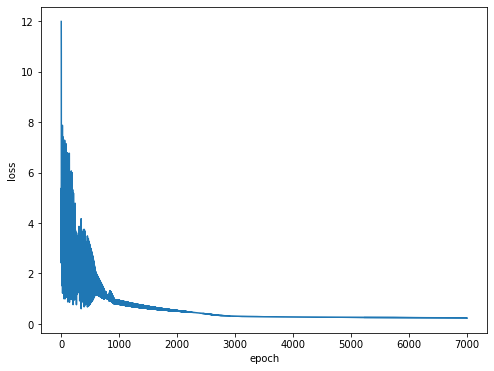

In [ ]:
# TO DO: Fit on training data with 3 classes, 7000 epochs, lr = 0.001 - 1 line
classifier = Classifer(num_classes=3, num_epochs=7000, lr=0.001, verbose=True).fit(X_train, y_train)

## Which accuarcy score do you expect to be higher? Why?

In [ ]:
# TO DO: print out the accuracy on training and test data
print("Test Accuracy: {}".format(classifier.score(X_test, y_test).round(3)))
print("Train Accuracy: {}".format(classifier.score(X_train, y_train).round(3)))

Test Accuracy: 0.889
Train Accuracy: 0.923


## Let's compare our model to sklearn's model! (The moment of truth)

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression().fit(X_train, y_train)
print('Test Accuracy:', clf.score(X_test, y_test).round(3))

Test Accuracy: 0.917


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Not too shaby, eh?